# Gaussian Discriminant Analysis on raw microchip data

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from math import sqrt

Below is the class which has defined training and testing functions as discussed in the attached pdf.

In [2]:
class GDA():
    def __init__(self):
        self.u0 = None
        self.u1 = None
        self.sig = None
        self.phi = None

    def train(self, x, y):
        self.u0 = np.mean(x[y['label'] == 0])
        self.u1 = np.mean(x[y['label'] == 1])
        self.phi = np.mean(y)

        t = x[y['label'] == 1] - self.u1
        # print(t.shape)
        f = x[y['label'] == 0] - self.u0
        tmp = (t.T.dot(t) + f.T.dot(f))
        # print(x.shape[0])
        self.sig = tmp/x.shape[0]
#         print(self.u0)
        
#         print(self.u1)
        
#         print(self.phi)
        
#         print(self.sig)
        return

    def test(self, x, y):
        n = x.shape[1]
        pi = 3.14
        det_sig = np.linalg.det(self.sig)
        inv_sig = np.linalg.inv(self.sig)
        # print(x)
        preds = []
        for _, row in x.iterrows():
            # print(row)
            tmp0 = row - self.u0
            tmp1 = row - self.u1
            
            # print(tmp0.shape)
            # print(inv_sig.shape)

            z0 = np.exp(0.5 * (np.dot(np.dot(tmp0.T, inv_sig), tmp0)))
            z1 = np.exp(0.5 * (np.dot(np.dot(tmp1, inv_sig), tmp1)))
            # print(z0, z1)

            px_py_0 = 1.0/((sqrt(pow((2*pi), n))*sqrt(det_sig)) * z0)
            px_py_1 = 1.0/((sqrt(pow((2*pi), n))*sqrt(det_sig)) * z1)

#             print(px_py_0, px_py_1)
            p_t = self.phi['label']
            # print(p_t)

            py_px_0 = px_py_0 * (1 - p_t)
            py_px_1 = px_py_1 * p_t
#             print(py_px_0, py_px_1)
            
            if py_px_0 > py_px_1 :
                 preds.append(0)
            else:
                preds.append(1)
 
        return preds


### Load Data

In [3]:
def load_data():
    data = pd.read_csv("data.csv", header = None)
    data.columns = ['x1', 'x2', 'label']
    data = data.sample(frac = 1)
    return data

### Split the dataset

In [4]:
def train_test_split(data, split = 0.7):
    data = data.reset_index(drop = True)
    idx = int(split*len(data))
    train_data, test_data = data.iloc[:idx], data.iloc[idx:]
    train_x, train_y = train_data.iloc[:,:2], train_data.iloc[:,-1:]
    test_x, test_y = test_data.iloc[:,:2], test_data.iloc[:,-1:]
    return train_x, train_y, test_x, test_y 

### ScatterPlot of data

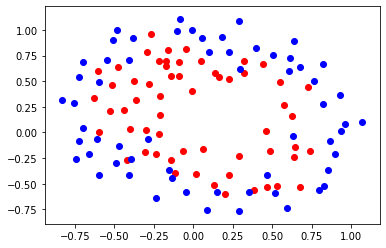

In [5]:
data = load_data()
# print(data.head())
pos_data = data[data.iloc[:,-1]==1]
neg_data = data[data.iloc[:,-1]==0]
plt.scatter(pos_data.iloc[:,0], pos_data.iloc[:,1], color="red")
plt.scatter(neg_data.iloc[:,0], neg_data.iloc[:,1], color="blue")


Train the model over the data and test it on the Testing set

In [6]:
split = 0.7
train_x, train_y, test_x, test_y = train_test_split(data, split)

model = GDA()
model.train(train_x, train_y)



preds = model.test(train_x, train_y)
preds = np.array(preds)
train_y = train_y['label'].to_numpy()

# print(preds)
# print(test_y)

count_wrong = lambda test_y,yy: sum([a != b for a,b in zip(train_y, yy)])
num_errs = count_wrong(preds, train_y)
total = len(train_y)

print("\nNumber of errors = {} out of {}".format(num_errs, total))
print('Accuracy on Trained data {:.4f}, Errors: {} out of {}'.format(1 - num_errs/total, num_errs, total))



preds = model.test(test_x, test_y)
preds = np.array(preds)
test_y = test_y['label'].to_numpy()

# print(preds)
# print(test_y)

count_wrong = lambda test_y,yy: sum([a != b for a,b in zip(test_y, yy)])
num_errs = count_wrong(preds, test_y)
total = len(test_y)

print("\nNumber of errors = {} out of {}".format(num_errs, total))
print('Accuracy on new Test Data {:.4f}, Errors: {} out of {}'.format(1 - num_errs/total, num_errs, total))



Number of errors = 0 out of 82
Accuracy on Trained data 1.0000, Errors: 0 out of 82

Number of errors = 18 out of 36
Accuracy on new Test Data 0.5000, Errors: 18 out of 36
